<u> <h1> 120 Years of Olympic History - Group number 1 </h1></u>

---

<center><img src="https://media4.giphy.com/media/l2SpVPT2FnKozPDby/giphy.gif?cid=ecf05e47oj3fdr2c0vxys8zt8rauepk2bkwtjqdy1y3qtf86&rid=giphy.gif&ct=g"  
     width="500" style="text-align:center;"> </center>
     
---

    
<u> <h1> Presenting by:</h1></u>
<h4> Eliya Zaguri</h4>
<h4> Matan Vidal</h4>
<h4> Adar Saban</h4>

<u> <h1>Table of contents </h1></u>

Link to source : https://www.kaggle.com/datasets/mysarahmadbhat/120-years-of-olympic-history

Link to github project page :https://github.com/AdarSaban/olypmic_project

1. [Arranging and clearing the data according to our needs](#section1)

2. [Key comprehension](#section2)

3. [First conclusion](#section3)

4. [Second conclusion](#section4)

5. [Third conclusion](#section5)

6. [Final conclusion](#section6)
---

<a id='section1'></a>
 # $\color{navy}{\text{Organize and clearing the data according to our needs}}$ 


### Performing import and reading of a database


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

url='https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/athlete_events%20-%20Copy.csv '
data=pd.read_csv(url)

### Checking the indentation of the column title.

In [3]:
data.dtypes 

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

### Filling in missing values ​​for each sport in its field according to the average of that field.

In [4]:
data["Age"] = data.groupby('Sport')['Age'].apply(lambda x: x.fillna(x.mean()))
data["Height"] = data.groupby('Sport')['Height'].apply(lambda x: x.fillna(x.mean()))
data["Weight"] = data.groupby('Sport')['Weight'].apply(lambda x: x.fillna(x.mean()))

### Deletion of sports categories where the number of medals is low. Focus on popular sports.

In [5]:
data.Sport.unique()
data['Sport'].value_counts(ascending=True)
data=data.groupby('Sport').filter(lambda x : len(x)>100) 
data['Sport'].value_counts(ascending=False)

Athletics                    27472
Gymnastics                   18333
Swimming                     16298
Shooting                      8086
Fencing                       7772
Cycling                       7716
Rowing                        7319
Cross Country Skiing          6364
Alpine Skiing                 6319
Wrestling                     4994
Football                      4933
Sailing                       4710
Equestrianism                 4470
Boxing                        4350
Canoeing                      4302
Speed Skating                 3829
Ice Hockey                    3746
Hockey                        3707
Biathlon                      3301
Basketball                    3243
Weightlifting                 2766
Judo                          2705
Handball                      2652
Water Polo                    2628
Art Competitions              2597
Volleyball                    2323
Bobsleigh                     2076
Diving                        2008
Tennis              

### Check that there are no cells with missing values. (Except what we want)

In [6]:
data.isnull().sum().sort_values(ascending=True)

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     162761
dtype: int64

---
<a id='section2'> </a>
 # $\color{navy}{\text{Key comprehension}}$ 

### Presentation of the top 10 countries with the most participants and medals over the years .

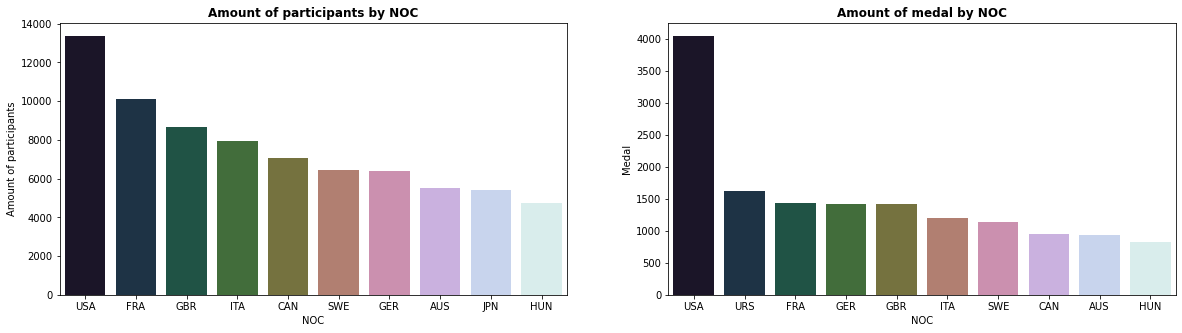

In [7]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)
Top_10=pd.DataFrame(data[['NOC']].value_counts().sort_values(ascending=False).head(10).reset_index(name='Amount of participants'))
barpolt_amount_of_part=sns.barplot(data=Top_10,x='NOC',y='Amount of participants',ax=axes[0],palette="cubehelix");
Medal_by_countries=data.groupby(['NOC'])[['Medal']].count().sort_values(by='Medal',ascending=False).reset_index().head(10)
barplot_amount_of_medal=sns.barplot(data=Medal_by_countries,x='NOC',y='Medal',ax=axes[1],palette="cubehelix");
plt.subplots_adjust(wspace = 0.2)
barpolt_amount_of_part.set_title('Amount of participants by NOC',fontweight ="bold")
barplot_amount_of_medal.set_title('Amount of medal by NOC',fontweight ="bold")
plt.show()

---
<a id='section3'> </a>
  # $\color{navy}{\text{First conclusion}}$ 

### We examined whether the gender gap between males and females over the years, in participation and winning a medal.

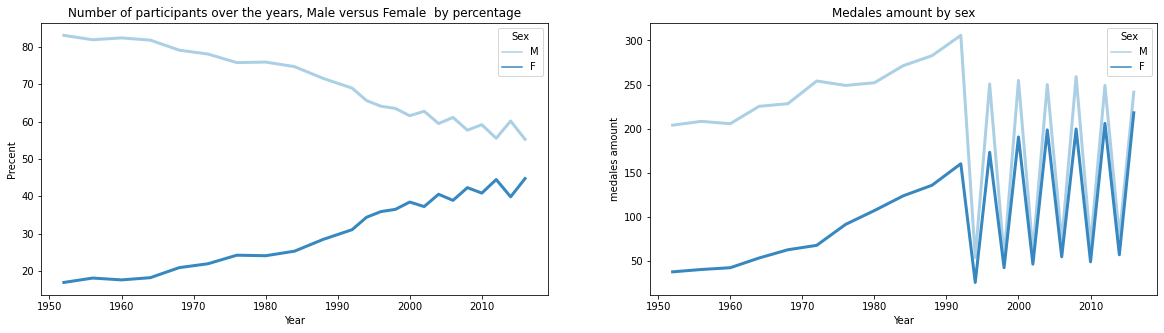

In [8]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)
last_sixty_years=data[data.Year>=1950] 
data_by_sex_year=last_sixty_years.groupby('Year')[['Sex']].value_counts().reset_index(name='Participants')
data_by_sex_year['Precent']=data_by_sex_year.groupby('Year')['Participants'].transform(lambda x:(x/x.sum()*100))
first_conclusion=sns.lineplot(data=data_by_sex_year, x="Year", y="Precent", hue="Sex",ax=axes[0],palette='Blues',lw=3);
first_conclusion.set_title('Number of participants over the years, Male versus Female  by percentage');
g_medal_by_sex_year=last_sixty_years.groupby(['Sex','Year'])['Medal'].value_counts().reset_index(name='medales amount').sort_values(by='medales amount',ascending=False)
lineplot_Medal_amount_by_sex=sns.lineplot(data=g_medal_by_sex_year, x="Year", y="medales amount", hue="Sex",ax=axes[1],palette="Blues",ci=None,lw=3);
plt.subplots_adjust(wspace = 0.2)
lineplot_Medal_amount_by_sex.set_title('Medales amount by sex');
plt.show()


 ## As you can see from the graphs. The gap is narrowing over the years, both in the number of participants and in the number of medal wins.
<center><img src="https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/olympic-gender.jpg" alt="centered image" 
     width="600"  > </center>



---
<a id='section4'></a>
  #  $\color{navy}{\text{Second conclusion}}$ 

### Several studies show that the peak fitness of athletes is between the ages of 26-28. We wanted to see if the age of winning the medal matched the statement.

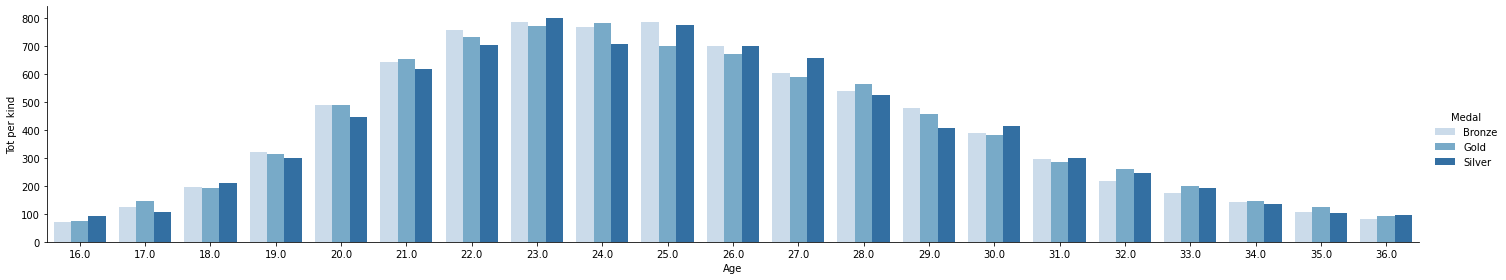

In [9]:
data_no_NaN=data.dropna()
data_no_NaN.isnull().sum().sort_values(ascending=False)
data_no_NaN=data_no_NaN[(data_no_NaN.Age<=36)&(data_no_NaN.Age>=16)].round()
data_Age_by_Medal=data_no_NaN.groupby('Medal')[['Age']].value_counts().reset_index(name='Tot per kind').round(1)
data_Age_by_Medal=pd.DataFrame(data_Age_by_Medal)
sns.catplot(data=data_Age_by_Medal,x="Age",y="Tot per kind",kind="bar",aspect=5,height=4,hue="Medal",palette='Blues');

### As can be seen from the graph, the winning age that collected the most medals is between ages 23-25. The claim does not match the winning age.
<center><img src="https://raw.githubusercontent.com/AdarSaban/olypmic_project/b5bd4ec22670af03b5a9bd16edf66680afa0e941/hhfs9tf9mck02d8ilnqq.jpg" alt="centered image" height="200
    " width="1400"> </center>



---
<a id='section5'></a>
  # $\color{navy}{\text{Third conclusion}}$ 

### BMI is a measure that gives a quantitative assessment of whether a person is at a normal weight and height. 
### We examined whether there is a contact between a intact BMI(18.5-25) measure and winning  a medal .


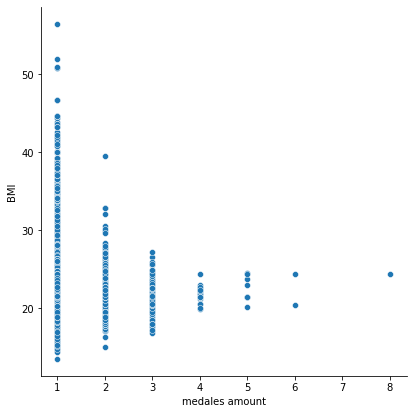

In [10]:
data_of_medal_by_id=data.groupby(['ID','Age','Height','Weight'])['Medal'].value_counts().reset_index(name='medales amount')
data_with_BMI=data_of_medal_by_id.assign(BMI=lambda x: ((x['Weight'])/ ( (x['Height']/100)**2) ))
data_with_BMI
plot = sns.relplot(x='medales amount',y="BMI", data=data_with_BMI, kind="scatter",palette="Blues");
plot.fig.set_size_inches(6,6)


### As can be seen from the graph, there is a coordinate between intact BMI and amount of medal.
### The athletes that won extraordinary medal amount, Their BMI approaches to be more intact .

<center><img src="https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/f92b1ea8-0e84-72c9-2a95-9b11fd9dc8bb.jpg" alt="centered image" height="200
    " width="800"> </center>


---
<a id='section6'></a>
  # $\color{navy}{\text{Final conclusion}}$ 



### We wanted to test whether when a country hosts the Olympics the number of medal wins increases.
### And how significant the hospitality is.

In [11]:
data=data.rename(columns={'City':'Host_city'})
data.Host_city.unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [12]:
len(data.Host_city.unique())

42

In [13]:
NOC_dict={'ESP':'Barcelona',
       'London':'GBR',
       'Antwerpen':'BEL',
       **dict.fromkeys(['Paris','Albertville','Chamonix','Grenoble'],'FRA'), 
       **dict.fromkeys(['Calgary','Montreal','Vancouver'],'CAN'),
       **dict.fromkeys(['Lillehammer','Oslo'],'NOR'),
       **dict.fromkeys(['Los Angeles','Salt Lake City','Atlanta','Lake Placid','Squaw Valley','Mexico City','St. Louis'],'USA'),
       'Seoul':'KOR',
       **dict.fromkeys(['Berlin','Munich', 'Garmisch-Partenkirchen'],'GER'),
       'Stockholm':'SWE',
       **dict.fromkeys(['Nagano','Tokyo','Sapporo'],'JPN'),
       **dict.fromkeys(['Sydney','Melbourne'],'AUS'),  
       'Rio de Janeiro':'BRA',
       **dict.fromkeys(['Roma','Torino',"Cortina d'Ampezzo"],'ITA'),
       'Beijing':'CHN',
       'Athina':'GRE',
       **dict.fromkeys(['Moskva','Sochi'],'URS'),
       'Amsterdam':'NED',
       'Helsinki':'FIN',
       'Sarajevo':'BIH',
       'Innsbruck':'AUT',
       'Sankt Moritz':'SUI'}   

In [14]:
data['Host_city_by_NOC']=data.Host_city.map(NOC_dict)
data.loc[data.Host_city=='Athina'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Host_city,Sport,Event,Medal,Host_city_by_NOC
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,GRE
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN,GRE
171,72,Aleksey Aleksandrovich Abalmasov,M,24.0,180.0,83.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NaN,GRE
177,75,Giorgos Abalof,M,22.0,178.0,70.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Men's epee, Individual",NaN,GRE
183,81,Georgios Abaris,M,22.0,190.0,77.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,NaN,GRE


In [15]:
median_BMI=data_with_BMI.BMI.median()
data['BMI']=data_with_BMI['BMI'].round(2)
data.BMI.fillna(median_BMI,inplace=True)
n=new_data=data.loc[(data.BMI<=25)&(data.BMI>=20)&(data.Age<=26)&(data.Age>=22)].round(2).copy()
new_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Host_city,Sport,Event,Medal,Host_city_by_NOC,BMI
1,2,A Lamusi,M,23.0,170.0,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,GBR,22.12
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.50,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,USA,23.96
35,15,Arvo Ossian Aaltonen,M,22.0,178.5,70.48,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,SWE,22.58
36,15,Arvo Ossian Aaltonen,M,22.0,178.5,70.48,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,SWE,23.55
66,20,Kjetil Andr Aamodt,M,22.0,176.0,85.00,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Slalom,NaN,NOR,20.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190351,95600,Mariusz Podkocielny,M,24.0,193.0,75.00,Poland,POL,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 400 metres Freestyle,NaN,NaN,22.99
190352,95600,Mariusz Podkocielny,M,24.0,193.0,75.00,Poland,POL,1992 Summer,1992,Summer,Barcelona,Swimming,"Swimming Men's 1,500 metres Freestyle",NaN,NaN,22.99
190353,95600,Mariusz Podkocielny,M,24.0,193.0,75.00,Poland,POL,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN,NaN,22.99
190356,95601,Iouri Aleksandrovich Podladtchikov,M,25.0,184.0,76.00,Switzerland,SUI,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Men's Halfpipe,Gold,URS,22.99


In [16]:
new_data['host country?']=np.where(new_data.NOC==new_data.Host_city_by_NOC,'True','False')
onlt_true = new_data.loc[new_data['host country?']=='True']


In [17]:
data_true=new_data.loc[new_data['host country?']=='True']
all_participent_t=len(data_true)
all_winners_t=len(data_true.dropna())
true_ratio=(all_winners_t/all_participent_t)*100
true_ratio


24.644180152076427

In [18]:
false=new_data.loc[new_data['host country?']=='False']
all_participent_f=len(false)
all_winners_f=len(false.dropna())
false_ratio=(all_winners_f/all_participent_f)*100
false_ratio

13.240937536899281

In [19]:
df = pd.DataFrame({'host': [true_ratio , 100-true_ratio],
                   'guest': [false_ratio,100- false_ratio]},
                  index=['medal winning percent', 'not winning medal  percent'])
df

,host,guest
medal winning percent,24.64418,13.240938
not winning medal percent,75.35582,86.759062


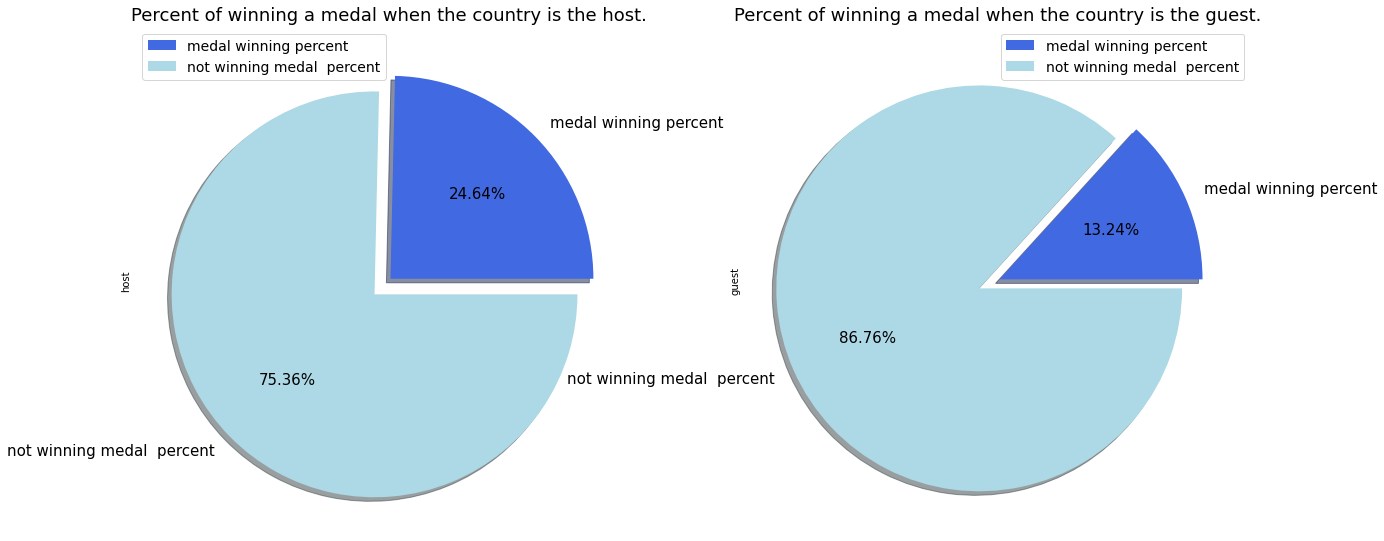

In [20]:
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.title("Percent of winning a medal when the country is the host.",fontsize=18)
plotpie=df['host'].plot.pie(autopct='%1.2f%%',colors = ['royalblue', 'lightblue'],fontsize=15,explode=(0.01, 0.1),shadow=True,legend=False)
plt.legend(fontsize=14)
plt.subplot(1,2,2)
plt.title("Percent of winning a medal when the country is the guest.",fontsize=18)
plotpie=df['guest'].plot.pie(autopct='%1.2f%%',colors = ['royalblue', 'lightblue'],fontsize=15,explode=(0.01, 0.1),shadow=True,legend=False)
plt.legend(fontsize=14)
plt.show()


### As can be seen from the graph,
### When a country hosts an Olympics the probability of winning medals increase by more than 10 percent compared to when the country is the guest .  
---

# Summary, presenting a number of key conclusions regarding the Olympics in modern times, leading countries, narrowing the gap between women and men, defining the ultimate athlete and the effects of hosting the Olympics.